# Кластеризация

## Алгоритм k-средних

Кластерный анализ – это способ группировки многомерных объектов, основанный на представлении результатов отдельных наблюдений точками подходящего геометрического пространства с последующим выделением групп как «сгустков» этих точек (кластеров, таксонов). Задачей такого разделения на группы является ухватить естественную структуру данных и абстрагироваться от индивидуальных характеристик каждого объекта к более общим признакам, которые объединяют эти объекты в кластеры. 

Так как заранее не известно по каким признакам следует объединять объекты в кластеры, то кластерный анализ относят к методам обучения без учителя (unsupervised learning).

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [2]:
%matplotlib inline
import random
import math
from math import fsum
from math import sqrt
from copy import deepcopy

в методе k-средних значение каждого признака объекта воспринимается как координата в многомерном пространстве (например, если у нам известен только рост и вес человека, то мы имеем дело с двумерным объектом, где одна из координат это рост, а вторая - вес); схожесть объектов можно вычислить используя любую математическую функцию (метрику) схожести; обычно выбирается Евклидово расстояние

In [3]:
def distance(v1, v2, ax=1):
    return np.linalg.norm(v1 - v2, axis=ax)   # Расстояние между точками и центроидами


Одним из наиболее простых и распространенных алгоритмов кластеризации является алгоритм k-средних (k-means), в котором каждый кластер представлен его центром (центроидом).

Метод k-средних – это метод кластерного анализа, цель которого является разделение m наблюдений (из пространства ) на k кластеров, при этом каждое наблюдение относится к тому кластеру, к центру (центроиду) которого оно ближе всего. 

k означает число кластеров. Число кластеров не определяется автоматически и в каждом кластере может быть разное число объектов;

k-средних использует двух шаговый эвристический* подход к группированию похожих объектов: шаг присваивания и шаг обновления;

схожесть (похожесть) объектов измеряется с помощью функции дистанции.

Сноски:

* Эвристический алгоритм (эвристика) — алгоритм решения задачи, включающий практический метод, не являющийся гарантированно точным или оптимальным, но достаточный для решения поставленной задачи. Позволяет ускорить решение задачи в тех случаях, когда точное решение не может быть найдено.

In [4]:
class KMeans:
    def __init__(self, n_clusters, max_iter=500):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        n_samples = len(X)
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        centroids_old = np.zeros(centroids.shape)   
        clusters = np.zeros(n_samples)  

        while True:
            for i in range(n_samples):
                distances = distance(X[i,], centroids)
                clusters[i] = distances.argmin()
            centroids_old = deepcopy(centroids)
            for k in range(self.n_clusters):
                centroids[k] = X[clusters == k,].mean(axis=0) 
            error = distance(centroids, centroids_old, None)
            if (error >= 0) and (error <= 0.01):
                self.clusters = clusters.astype("int") 
                self.centroids = centroids
                break

    def predict(self, y):
        y_unique = np.unique(y)  
        y_unique_num = [i for i in range(len(np.unique(y)))]    
        n_samples = len(X)
        clusters = np.zeros(n_samples)  
        for k in range(n_samples):  
            for j in range(self.n_clusters):
                if y[k][0] == y_unique[j]:
                    y[k] = y_unique_num[j]
            clusters[k] = y[k]
        centroids = X[np.random.choice(X.shape[0], self.n_clusters,
                                       replace=False)]   
        centroids_old = np.zeros(centroids.shape)  
        while True:
            centroids_old = deepcopy(centroids)
            error = distance(centroids, centroids_old, None)
            if error == 0:
                self.clusters = clusters.astype(int)
                self.centroids = centroids
        return self.centroids, self.clusters 


In [5]:
iris = pd.read_csv("iris.csv")

In [6]:
X = iris.loc[:, iris.columns != "Name"].as_matrix()

C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
model = KMeans(3)
model.fit(X)

In [8]:
clusters = model.clusters
plt.figure(figsize=(14, 7))
colormap = np.array(["black", "red", "yellow"]) # Create a colormap

<Figure size 1008x504 with 0 Axes>

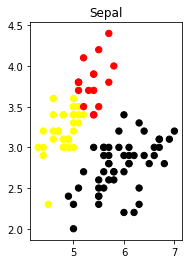

In [9]:
plt.subplot(1, 2, 1)
plt.scatter(iris.SepalLength, iris.SepalWidth, c=colormap[clusters], s=40)
plt.title("Sepal") #чашелистник
plt.show()